In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_selector

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../../Jian/FE v5/covid_19_patient_features_v5.csv')

In [3]:
df.set_index('patient_no', inplace=True, drop=True)

In [33]:
pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [5]:
df.replace("<", "", inplace=True)
df.replace(">", "", inplace=True)

In [6]:
df.astype('float64', copy=True, errors='ignore')

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,HSCRP,DD,TT,FIB,APTT,INR,PT,AT3,BCF8,PS,PC,FDP,ALG,ALB,ALP,ALT,AST,BUN,U,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,LAP,5NT,HC,SAA,SdLDL,CHE,AFU,LPA,APOA1,APOB,IBIL,FDG,LPS,LAC,BNP,SA,CD3+,CD4+,CD8+,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,C1q,C3,C4,IGM,IGA,IGG,ASO,RF,UALB,SQEP,NSEC,HYAL,UNCC,BYST,MS-U,UNCX,URBC,UWBC,SG,PH,WBCC,BACT
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,Union,81.0,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.00,1.13,0.30,3.10,8.70,41.2,46.70,17.2,39.3,12.5,3.94,2.42,22.00,15.40,<0.13,NaN,1.26,17.20,4.46,38.50,1.11,14.1,NaN,NaN,NaN,NaN,NaN,1.2,34.7,52.0,63.00,44.00,6.96,NaN,2.08,101.8,29.9,74.3,21.0,29.0,4.15,0.94,141.1,0.97,9.8,63.7,273.8,4.01,232.00,0.64,299.0,0.72,9.0,4.1,4.82,2.92,302.3,0.13,0.7,215.0,0.89,25.0,6.0,6.60,155.8,1.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 2,Union,50.0,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,31.5,90.2,41.5,145.0,12.6,0.14,10.5,134.0,0.00,0.00,0.09,0.66,1.20,0.00,0.00,4.60,33.8,61.60,29.7,41.9,12.6,4.60,1.95,18.00,39.00,0.15,NaN,0.35,18.50,4.82,43.70,0.91,12.0,NaN,NaN,NaN,NaN,NaN,1.6,40.9,36.0,50.00,45.00,4.05,NaN,2.29,99.9,17.2,75.1,49.0,25.9,4.32,0.81,138.2,1.32,9.5,66.8,342.3,3.21,102.00,0.92,392.0,0.77,21.0,3.2,6.63,1.89,295.7,0.15,3.2,284.0,0.75,29.0,9.0,7.10,204.5,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.70,2.10,4.87,8.08,2.13,2.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.40,0.10,7.50,16.9,75.10,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.00,63.00,6.07,NaN,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.00,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.60,0.00,5.80,13.9,79.70,16.3,40.0,12.7,4.48,5.25,19.00,66.40,<0.13,NaN,1.70,19.10,4.77,38.80,0.94,12.4,NaN,NaN,NaN,NaN,NaN,1.2,31.7,66.0,35.00,47.00,6.63,NaN,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.00,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,28.0,8.0,5.70,662.0,0.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.10,0.00,5.90,22.4,71.60,20.9,40.9,12.8,4.49,7.31,NaN,NaN,<0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.

In [7]:
df['TT'].str.replace(">", "")

patient_no
Patient 1       17.20
Patient 2       18.50
Patient 3         NaN
Patient 4       19.10
Patient 5         NaN
                ...  
Patient 1517    19.50
Patient 1518      NaN
Patient 1519      NaN
Patient 1520      NaN
Patient 1521      NaN
Name: TT, Length: 1521, dtype: object

In [30]:
for c in df.columns:
    if df[c].dtype  == 'object':
        try:
            df[c] = df[c].str.replace(">", "").astype(float)
            df[c] = df[c].str.replace("<", "").astype(float)
        except: ValueError

In [16]:
df = df.astype('float64', copy=True, errors='ignore')

In [31]:
df['TT']['Patient 686']

240.0

In [91]:
#df['TT'] = df['TT'].str.replace(">", "")

In [92]:
#df['TT'].astype('float64', copy=True, errors='raise')

patient_no
Patient 1        17.2
Patient 2        18.5
Patient 3         NaN
Patient 4        19.1
Patient 5         NaN
Patient 6         NaN
Patient 7        17.2
Patient 8        16.4
Patient 9        17.8
Patient 10       16.0
Patient 11       16.1
Patient 12       17.3
Patient 13       19.1
Patient 14        NaN
Patient 15       14.9
Patient 16        NaN
Patient 17       18.7
Patient 18       15.3
Patient 19       14.7
Patient 20       18.2
Patient 21       16.0
Patient 22        NaN
Patient 23       13.7
Patient 24       16.6
Patient 25        NaN
Patient 26       16.8
Patient 27       17.6
Patient 28       17.3
Patient 29       15.3
Patient 30       19.7
Patient 31       19.9
Patient 32       16.4
Patient 33       16.6
Patient 34       14.5
Patient 35       15.8
Patient 36       19.2
Patient 37       15.7
Patient 38       14.9
Patient 39       18.1
Patient 40        NaN
Patient 41        NaN
Patient 42       15.9
Patient 43       15.2
Patient 44       15.9
Patient 45        NaN

C1q                          object
C3                           object
C4                           object

In [40]:
df.drop(columns=['C1q', 'C3', 'C4'], inplace=True)

In [41]:
df.dtypes

Hospital                     object
Age                         float64
Gender                       object
Body_temperature            float64
Underlying_diseases          object
SARS-CoV-2_nucleic_acids     object
CT                           object
Morbidity                    object
Mortality                    object
MCHC                        float64
MCH                         float64
MCV                         float64
HCT                         float64
HGB                         float64
PDW                         float64
PLCT                        float64
MPV                         float64
PLT                         float64
BA                          float64
EO                          float64
MO                          float64
LY                          float64
NE                          float64
BAP                         float64
EOP                         float64
MOP                         float64
LYP                         float64
NEP                         

In [45]:
round(df.isnull().sum() / len(df) * 100, 2)

Hospital                      0.00
Age                           0.00
Gender                        0.00
Body_temperature              9.99
Underlying_diseases           0.00
SARS-CoV-2_nucleic_acids      0.00
CT                           11.77
Morbidity                     0.00
Mortality                     0.00
MCHC                         16.04
MCH                          16.04
MCV                          16.04
HCT                          16.04
HGB                          16.04
PDW                          23.80
PLCT                         23.80
MPV                          16.63
PLT                          16.04
BA                           20.71
EO                           16.96
MO                           16.44
LY                           16.44
NE                           16.44
BAP                          19.40
EOP                          16.83
MOP                          16.44
LYP                          16.44
NEP                          16.44
PLCR                

In [46]:
percent_null = round(df.isnull().sum() /len(df) * 100, 2)

In [51]:
 df_filtered = df.drop(columns=percent_null[percent_null > 80].index.to_list())

In [76]:
df_filtered.head(20)

,Hospital,Age,Gender,Body_temperature,Underlying_diseases,SARS-CoV-2_nucleic_acids,CT,Morbidity,Mortality,MCHC,MCH,MCV,HCT,HGB,PDW,PLCT,MPV,PLT,BA,EO,MO,LY,NE,BAP,EOP,MOP,LYP,NEP,PLCR,RDWSD,RDWCV,RBC,WBC,ESR,CRP,PCT,DD,TT,FIB,APTT,INR,PT,ALG,ALB,ALP,ALT,AST,BUN,CA,CL,CO2,CREA,GGT,GLB,K,MG,Na,PHOS,TBIL,TP,URIC,CHOL,CK,HDLC,LDH,TG,AnG,DBIL,GLU,LDLC,OSM,PA,TBA,HBDH,CysC,HC,SAA,SdLDL,BC,NKC,CD4/CD8,IL-2,IL-4,IL-6,IL-10,TNF,IFN,target
patient_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Patient 1,Union,81.0,Male,36.6,"Hypertension, Thyroidectomy",Positive,Positive,Regular,Cured,344.0,31.2,90.7,35.8,123.0,16.4,0.26,8.5,304.0,0.01,0.07,0.21,1.00,1.13,0.3,3.1,8.7,41.2,46.7,17.2,39.3,12.5,3.94,2.42,22.0,15.40,0.13,1.26,17.2,4.46,38.5,1.11,14.1,1.2,34.7,52.0,63.0,44.0,6.96,2.08,101.8,29.9,74.3,21.0,29.0,4.15,0.94,141.1,0.97,9.8,63.7,273.8,4.01,232.0,0.64,299.0,0.72,9.0,4.1,4.82,2.92,302.3,0.13,0.7,215.0,0.89,6.60,155.8,1.10,7.56,5.72,2.35,2.53,2.21,9.59,4.48,1.67,1.75,2
Patient 2,Union,50.0,Male,38.7,No,Positive,Positive,Regular,Cured,349.0,31.5,90.2,41.5,145.0,12.6,0.14,10.5,134.0,0.00,0.00,0.09,0.66,1.20,0.0,0.0,4.6,33.8,61.6,29.7,41.9,12.6,4.60,1.95,18.0,39.00,0.15,0.35,18.5,4.82,43.7,0.91,12.0,1.6,40.9,36.0,50.0,45.0,4.05,2.29,99.9,17.2,75.1,49.0,25.9,4.32,0.81,138.2,1.32,9.5,66.8,342.3,3.21,102.0,0.92,392.0,0.77,21.0,3.2,6.63,1.89,295.7,0.15,3.2,284.0,0.75,7.10,204.5,0.38,NaN,NaN,NaN,2.70,2.10,4.87,8.08,2.13,2.44,2
Patient 3,Union,65.0,Female,38.5,Postoperative cervical cancer,Positive,Positive,Regular,Cured,330.0,31.1,94.2,30.4,101.0,16.3,0.20,10.8,183.0,0.02,0.00,0.30,0.68,3.01,0.4,0.1,7.5,16.9,75.1,NaN,NaN,NaN,3.23,4.01,NaN,11.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,30.0,44.0,59.0,63.0,6.07,1.77,105.0,23.3,68.0,23.0,32.1,3.63,0.88,141.6,1.02,4.7,62.1,296.6,4.63,78.0,0.77,297.0,2.89,13.0,1.7,9.36,2.64,305.9,0.14,3.0,238.0,0.89,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Patient 4,Union,73.0,Male,38.5,Aorta calcification,Positive,Positive,Severe,Cured,337.0,30.7,91.3,40.9,138.0,16.2,0.23,8.3,272.0,0.03,0.00,0.30,0.73,4.19,0.6,0.0,5.8,13.9,79.7,16.3,40.0,12.7,4.48,5.25,19.0,66.40,0.13,1.70,19.1,4.77,38.8,0.94,12.4,1.2,31.7,66.0,35.0,47.0,6.63,2.05,100.2,21.9,81.8,65.0,26.4,4.66,0.81,137.2,0.73,9.6,58.1,242.3,3.57,83.0,1.04,546.0,1.30,15.0,3.7,5.80,1.94,296.1,0.09,4.4,378.0,0.83,5.70,662.0,0.57,27.43,13.64,3.10,2.50,2.26,60.28,6.58,2.20,3.07,1
Patient 5,Union,64.0,Female,38.0,No,Positive,Positive,Severe,Cured,329.0,30.4,92.4,41.5,136.0,16.4,0.20,9.1,215.0,0.01,0.00,0.43,1.64,5.23,0.1,0.0,5.9,22.4,71.6,20.9,40.9,12.8,4.49,7.31,NaN,NaN,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
Patient 6,Union,61.0,Female,37.6,"Asthma, Hypertension, Diabetes",Positive,Positive,Severe,Cured,348.0,31.4,90.5,35.1,122.0,16.4,0.28,12.3,230.0,0.02,0.03,0.57,1.35,4.39,0.3,0.5,9.0,21.2,69.0,42.0,40.3,12.3,3.88,6.36,102.0,136.00,0.13,0.83,NaN,NaN,NaN,NaN,NaN,1.2,38.3,65.0,17.0,20.0,4.04,2.10,93.5,27.6,49.3,36.0,31.0,4.22,0.73,138.5,0.90,10.7,69.3,269.8,NaN,40.0,NaN,283.0,NaN,17.0,4.5,14.08,NaN,303.6,0.11,0.7,NaN,NaN,NaN,NaN,NaN,11.00,19.61,1.24,2.63,1.53,24.13,4.70,2.03,1.63,1
Patient 7,Union,23.0,Female,38.7,No,Positive,NaN,Regular,Unknown,346.0,32.2,93.1,29.5,102.0,12.6,0.11,10.3,111.0,0.00,0.00,0.75,1.18,10.16,0.0,0.0,6.2,9.8,84.0,28.6,46.5,13.6,3.17,12.09,NaN,63.30,NaN,NaN,17.2,3.14,53.1,1.01,13.1,0.9,22.6,110.0,17.0,39.0,2.27,2.01,105.9,19.7,54.3,11.0,24.7,3.84,0.58,133.7,1.60,13.8,47.3,350.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
Patient 8,Union,41.0,Female,36.5,No,Positive,Positive,Regular,Cured,332.0,30.2,90.8,39.4,131.0,15.8,0.17,12.3,140.0,0.01,0.00,0.34,1.21,1.36,0.3,0.0,11.6,41.4,46.7,43.6,41.5,12.4,4.34,2.92,6.0,NaN,0.13,0.51,16.4,3.58,39.5,0.96,12.6,1.8,41.5,42.0,16.0

In [89]:
df_filtered.shape

(1521, 88)

In [91]:
df['Morbidity'].unique()

array(['Regular', 'Severe', 'Critically ill',
       'Suspected (COVID-19-confirmed later)', 'Mild', 'Suspected',
       'Control', 'Control (Community-acquired pneumonia)'], dtype=object)

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

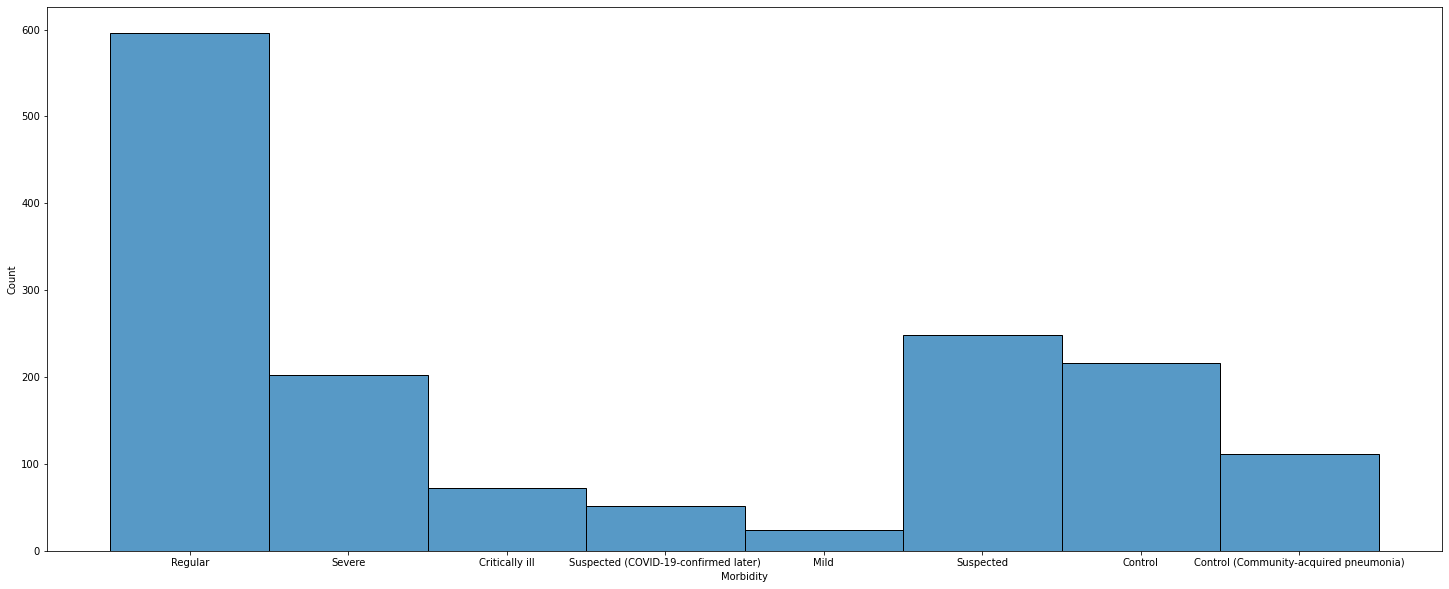

In [103]:
plt.figure(figsize=(25,10))
sns.histplot(df['Morbidity'])
plt.show()

In [67]:
#df_filtered['target']=np.where(df_filtered['SARS-CoV-2_nucleic_acids']=='Negative', 0, np.where( df_filtered['Morbidity'].isin(['Severe','Critically ill']) , 1, 2))

In [106]:
df_filtered['target']=np.where(df_filtered['SARS-CoV-2_nucleic_acids']=='Negative', 0, np.where( df_filtered['Morbidity'].isin(['Severe','Critically ill']) , 2, 1))

In [81]:
(df['SARS-CoV-2_nucleic_acids'] == 'Negative; Positive (Confirmed later)').sum()

51

In [80]:
#df_filtered['Morbidity'].isin(['Severe','Critically ill'])

In [87]:
X = df_filtered.drop(columns = ['SARS-CoV-2_nucleic_acids', 'Morbidity', 'Hospital', 'CT'])
y = df_filtered['target']

model = LogisticRegression()

        
preprocessing = ColumnTransformer(
    
    [
        ('scaler', MinMaxScaler(), make_column_selector(dtype_include='int64')),
        ('one_hot', OneHotEncoder(handle_unknown='ignore', sparse=False),\
             make_column_selector(dtype_include='object')),
    ]
)        
        
    
preprocessing.fit_transform(X)
        
final_pipe = Pipeline([
    ('preprocessing', preprocessing),
    ('logistic_regression', LogisticRegression())])



X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3)


#final_pipe.fit_transform(X_train, y_train)



In [ ]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
pd.DataFrame(cv_results)

In [ ]:
# predictions
final_pipe_trained.predict(X_test.iloc[:])

# Score model
final_pipe_trained.score(X_test,y_test)

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross validate pipeline
cross_val_score(final_pipe, X_train, y_train, cv=5, scoring='r2').mean()



In [ ]:
y_test = [0, 1, 0, 0, 1, 0, 1, 1, 0, 1] # actual truths
preds = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1] # predictions

results_df = pd.DataFrame({"actual": y_test,
                           "predicted": preds})#Store results in dataframe

confusion_matrix = pd.crosstab(index= results_df['actual'],
                               columns = results_df['predicted'])